# HOUSING PRICE PREDICTION
Link: https://drive.google.com/file/d/1yrVwfX1LjISQ6vdR1Kaht-S1_8y2Gk6z/view?usp=sharing
* Problem statement
    * You have been given a dataset that describes the functionality of houses. Now, based on the given features, you have to predict the house price.

* importing important libraries needed for the dataset

In [76]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
import plotly.graph_objects as go

In [5]:
df = pd.read_csv(r'C:\Users\shoba\Desktop\data_science\housing_price_dataset\Housing.csv')

In [6]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.shape

(545, 13)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum().sum()

0

In [11]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


* there are no null values in the entire dataframe
* there are no duplicated values in the entire dataframe
* there are 13 column and 545 rows in the dataframe
* some of the columns have object datatype
* from the dataframe we can conclude that the price is the target variable
* so were going to predict values with the help of the rest of the features
* after changing the dtype we are good go for the prediction part

In [12]:
df.mainroad.nunique()

2

In [13]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [14]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

* we can replace the yes with 0 and no with 1

In [15]:
df.mainroad.replace(['yes', 'no'], [0, 1],inplace=True)

In [16]:
df.mainroad.dtype

dtype('int64')

* we have changed the dtype to integer

In [17]:
df.guestroom.unique()

array(['no', 'yes'], dtype=object)

In [18]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

* we can replace the yes as 0 and no as 1.

In [19]:
df.guestroom.replace(['no', 'yes'], [1, 0],inplace=True)

In [20]:
df.guestroom.dtype

dtype('int64')

In [21]:
df.basement.unique()

array(['no', 'yes'], dtype=object)

In [22]:
df.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [23]:
df.basement.replace(['no', 'yes'], [1, 0], inplace=True)

In [24]:
df.basement.dtype

dtype('int64')

In [25]:
df.hotwaterheating.unique()

array(['no', 'yes'], dtype=object)

In [26]:
df.hotwaterheating.value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [27]:
df.hotwaterheating.replace(['no', 'yes'], [1, 0], inplace=True)

In [28]:
df.airconditioning.unique()

array(['yes', 'no'], dtype=object)

In [29]:
df.airconditioning.value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [30]:
df.airconditioning.replace(['yes', 'no'], [0, 1],inplace=True)

In [31]:
df.prefarea.unique()

array(['yes', 'no'], dtype=object)

In [32]:
df.prefarea.value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [33]:
df.prefarea.replace(['yes', 'no'], [0, 1],inplace=True)

In [34]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [35]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [36]:
df.furnishingstatus.replace(['furnished', 'semi-furnished', 'unfurnished'], [2, 1, 0], inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


* we have cleaned the data 
* we can now do the prediction using preffered ml model

In [38]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,-0.296898,-0.255517,-0.187057,-0.093073,-0.452954,0.384394,-0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,-0.288874,-0.140297,-0.047417,0.009229,-0.222393,0.352980,-0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.012033,-0.080549,-0.097312,-0.046049,-0.160603,0.139270,-0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,-0.042398,-0.126469,-0.102106,-0.067159,-0.186915,0.177496,-0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,-0.121706,-0.043538,0.172394,-0.018847,-0.293602,0.045547,-0.044425,0.104672
mainroad,-0.296898,-0.288874,0.012033,-0.042398,-0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,-0.204433,0.199876,-0.156726
guestroom,-0.255517,-0.140297,-0.080549,-0.126469,-0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,-0.037466,0.160897,-0.118328
basement,-0.187057,-0.047417,-0.097312,-0.102106,0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,-0.051497,0.228083,-0.112831
hotwaterheating,-0.093073,0.009229,-0.046049,-0.067159,-0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.067864,-0.059411,-0.031628
airconditioning,-0.452954,-0.222393,-0.160603,-0.186915,-0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,-0.159173,0.117382,-0.150477


<AxesSubplot:>

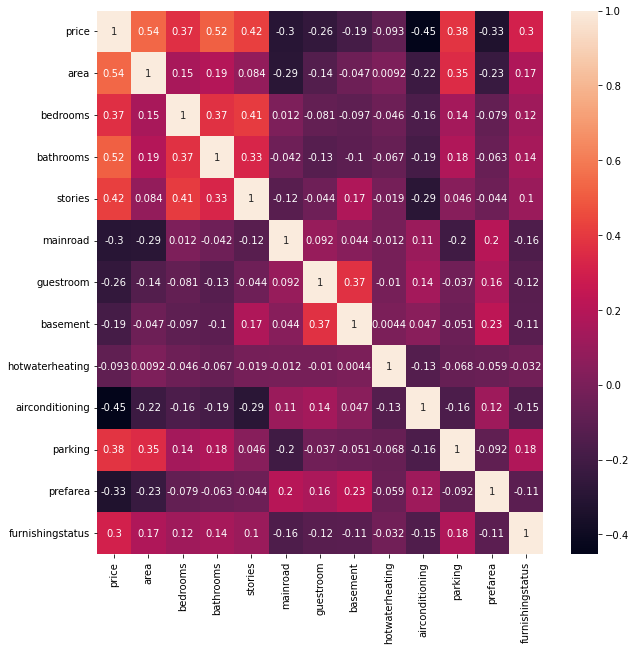

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

# PREDICTION

importing important libraries for the prediction 

In [101]:
from sklearn.linear_model import LinearRegression          # we are going to use lineaar regression for this datatype
from sklearn.svm import SVR                                
from sklearn.model_selection import train_test_split       # train test split used to spli the dataframe for testing and traaining part
from sklearn.metrics import r2_score                       # we are going to use r^2 metric to find the accuracy of the model

spliting dataset

In [61]:
X = df.drop("price", axis= 1)
y = df.price

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [87]:
modellr = LinearRegression()

In [88]:
modellr.fit(X_train, y_train)

LinearRegression()

In [90]:
predlr_y = modellr.predict(X_test)

In [93]:
predlr_y = predlr_y.astype(np.int64)

In [94]:
predlr = pd.DataFrame({"actual value": y_test, 'predicted value': predlr_y})

In [95]:
predlr

,actual value,predicted value
316,4060000,5203691
77,6650000,7257004
360,3710000,3062828
90,6440000,4559591
493,2800000,3332932
...,...,...
15,9100000,4933137
357,3773000,4377133
39,7910000,7009335
54,7350000,6351460


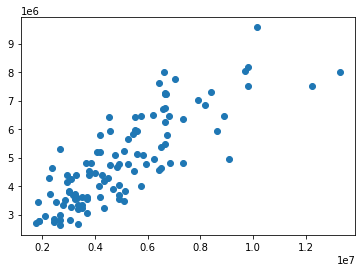

In [96]:
plt.scatter(predlr['actual value'], predlr['predicted value'])

In [97]:
pl.scatter(predlr, x= 'actual value', y = 'predicted value')